Sprawozdanie 4, Bazyli Polednia

In [1]:
import matplotlib.pyplot as plt
from numpy import linspace
from scipy import interpolate
from numpy import polyfit, clip
import sys
import warnings
import math

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from numpy import poly1d

Zadanie 1:

In [3]:
def lagrange(x, f_x):
    def Lf(x_Lf):
        sum = 0
        n = len(x)

        for i in range(n):
            mul = 1
            for j in range(n):
                if i != j:
                    mul *= (x_Lf - x[j])/(x[i] - x[j])
            sum += f_x[i] * mul

        return sum

    return Lf

Zadanie 2:

Mamy tu do czynienia z efektem Rungego przy interpolowaniu wielomianowym. Efekt ten mówi o pogarszaniu się przybliżenia przy wzroście liczby węzłów równoodległych, co jest szczególnie widoczne na krańcach przedziału. Dlatego używa się np. węzłów Czebyszewa, które są "gęściej upakowane" właśnie na krańcach.

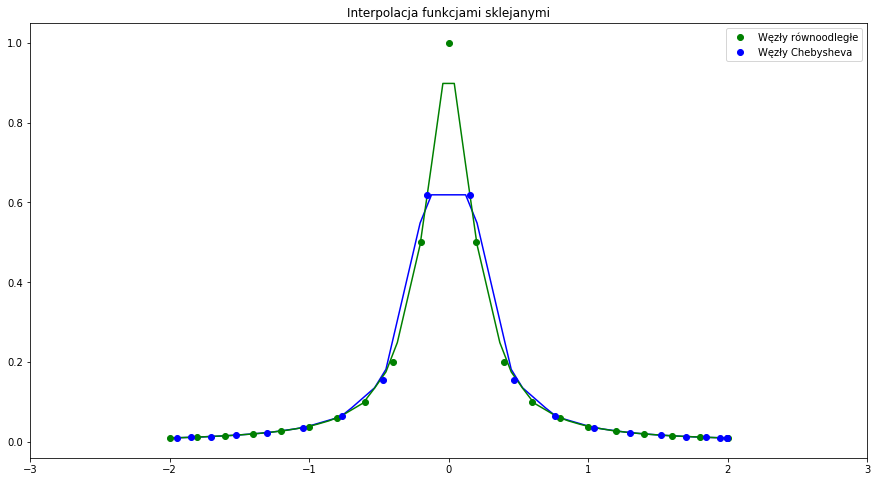

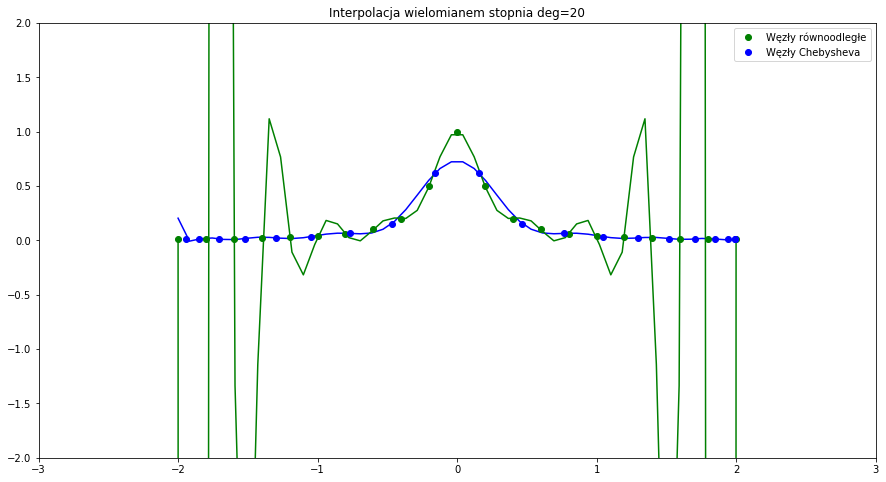

In [5]:
def f(x):
    return 1/(25*x*x + 1)

def chebyshev(a, b, n):
    returnArray = []

    for k in range(n):
        returnArray.append((a+b)/2 + ((b-a)*math.cos(((2*k-1)*math.pi)/(2*n)))/2)

    return returnArray


xAxis = linspace(-2,2)
x_rownoodlegle = linspace(-2, 2, 21)
y_rownoodlegle = f(x_rownoodlegle)


x_chebyshev = chebyshev(-2, 2, 20)
x_chebyshev = clip(x_chebyshev, -2, 2)
y_chebyshev = f(x_chebyshev)



splineInterpolationRownoodlegle = interpolate.interp1d(x_rownoodlegle, y_rownoodlegle, fill_value='extrapolate')
splineInterpolationChebyshev = interpolate.interp1d(x_chebyshev, y_chebyshev, fill_value='extrapolate')

polynomialInterpolationRownoodlegle = poly1d(polyfit(x_rownoodlegle, y_rownoodlegle, 20))
polynomialInterpolationChebyshev = poly1d(polyfit(x_chebyshev, y_chebyshev, 20))


plt.figure(figsize=(15,8))
plt.plot(xAxis, splineInterpolationChebyshev(xAxis), 'b')
plt.plot(xAxis, splineInterpolationRownoodlegle(xAxis), 'g')

plt.xlim(-3, 3)

plt.plot(x_rownoodlegle, y_rownoodlegle, 'go', label='Węzły równoodległe')
plt.plot(x_chebyshev, y_chebyshev, 'bo', label='Węzły Chebysheva')
plt.title('Interpolacja funkcjami sklejanymi')
plt.legend()
plt.show()


plt.figure(figsize=(15,8))
plt.plot(xAxis, polynomialInterpolationChebyshev(xAxis), 'b')
plt.plot(xAxis, polynomialInterpolationRownoodlegle(xAxis), 'g')

plt.xlim(-3, 3)
plt.ylim(-2, 2)

plt.plot(x_rownoodlegle, y_rownoodlegle, 'go', label='Węzły równoodległe')
plt.plot(x_chebyshev, y_chebyshev, 'bo', label='Węzły Chebysheva')
plt.title('Interpolacja wielomianem stopnia deg=20')
plt.legend()
plt.show()

Zadanie 3:

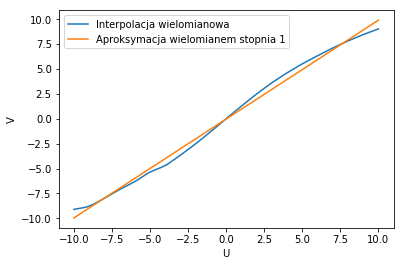

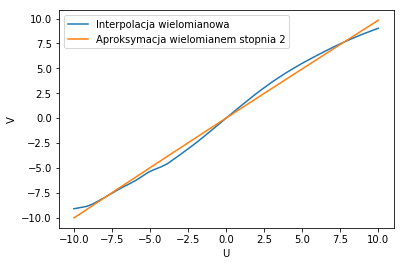

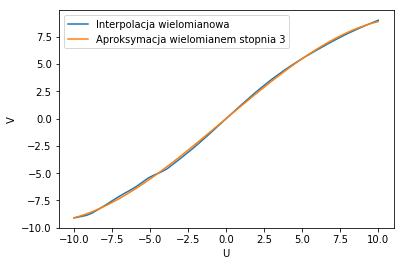

In [6]:
u = linspace(-10, 10, 21)
v = [-9.1, -8.82, -7.99, -7.1, -6.32, -5.33, -4.73, -3.65, -2.52, -1.28, 0, 1.26, 2.49, 3.61, 4.61, 5.51, 6.32, 7.1, 7.81, 8.45, 9.02]

polynomialInterpolation = interpolate.interp1d(u,v)

def polynomialReg1(u, v, x):
    array = polyfit(u,v,1)
    return array[0] * x + array[1]

def polynomialReg2(u, v, x):
    array = polyfit(u,v,2)
    return array[0] * x**2 + array[1] * x + array[2]

def polynomialReg3(u, v, x):
    array = polyfit(u,v,3)
    return array[0] * x**3 + array[1] * x**2 + array[2] * x + array[3]

domain = linspace(-10, 10)

plt.plot(domain, polynomialInterpolation(domain), label="Interpolacja wielomianowa")
plt.plot(domain, polynomialReg1(u, v, domain), label="Aproksymacja wielomianem stopnia 1")
plt.xlabel('U')
plt.ylabel('V')
plt.legend()
plt.show()

plt.plot(domain, polynomialInterpolation(domain), label="Interpolacja wielomianowa")
plt.plot(domain, polynomialReg2(u, v, domain), label="Aproksymacja wielomianem stopnia 2")
plt.xlabel('U')
plt.ylabel('V')
plt.legend()
plt.show()

plt.plot(domain, polynomialInterpolation(domain), label="Interpolacja wielomianowa")
plt.plot(domain, polynomialReg3(u, v, domain), label="Aproksymacja wielomianem stopnia 3")
plt.xlabel('U')
plt.ylabel('V')
plt.legend()
plt.show()

Zadanie 4:

In [7]:
t_read = [0., 1., 2., 3.]
x_read = [0., 42.7, 73.2, 92.5]

def x(t):
    array = polyfit(t_read, x_read, 5)
    return array[0] * t**5 + array[1] * t**4 + array[2] * t**3 + array[3] * t**2 + array[4] * t + array[5]

def v(t):
    array = polyfit(t_read, x_read, 5)
    #x = array[0] * t**5 + array[1] * t**4 + array[2] * t**3 + array[3] * t**2 + array[4] * t + array[5]
    #V(t) = dx/dt
    return 5 * array[0] * t**4 + 4 * array[1] * t**3 + 3 * array[2] * t**2 + 2 * array[3] * t + array[4]

tMiniecia = interpolate.interp1d(x_read, t_read)(79.6)
print("Czas minięcia: ", tMiniecia, "s")
print("Prędkość przy minięciu: ",v(tMiniecia), "m/s")

Czas minięcia:  2.3316062176165797 s
Prędkość przy minięciu:  19.709971103555667 m/s
